In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [112]:
df=pd.read_csv("amazon_prime_titles.csv")

In [113]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [114]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 831.0+ KB


In [116]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

In [117]:
[features for features in df.columns if df[features].isnull().sum()>0]

['director', 'cast', 'country', 'date_added', 'rating']

#HANDLING OF NULL VALUES

In [118]:
df["director"]=df["director"].fillna(df["director"].mode()[0])

In [119]:
df["cast"]=df["cast"].fillna(df["cast"].mode()[0])

In [120]:
df["country"]=df["country"].fillna(df["country"].mode()[0])

In [121]:
df["date_added"]=df["date_added"].fillna(df["date_added"].mode()[0])

In [122]:
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

#so now there is no null values present in the dataset.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 831.0+ KB


In [124]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary


                                                         #UNIVARIATE ANALYSIS

                                             Q1.How many types are Movies vs TV Shows?

<Axes: xlabel='count', ylabel='type'>

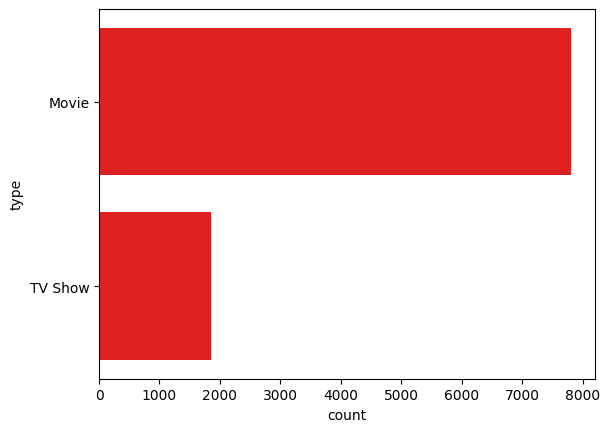

In [125]:
sns.countplot(df["type"],color="red")

                                                                 # Conclusion:->
                                                              1. Movies have more count than TV shows which means people are more
                                                                investing their time in watching the movies rather than watching any 
                                                                TV shows because movies can be able to finish in very less time while 
                                                                the TV shows finishes in several days. 


In [126]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


In [127]:
# top_years = df['release_year'].value_counts().nlargest(10)

# sns.barplot(x=top_years.index, y=top_years.values, color='lightgreen')
# plt.title("Top 10 Years with Most Releases")
# plt.xlabel("Year")
# plt.ylabel("Number of Releases")
# plt.show()


                                            Q2.Which years saw the highest number of releases?

In [128]:
oko=df["release_year"].value_counts().index

In [129]:
oyo=df["release_year"].value_counts().values

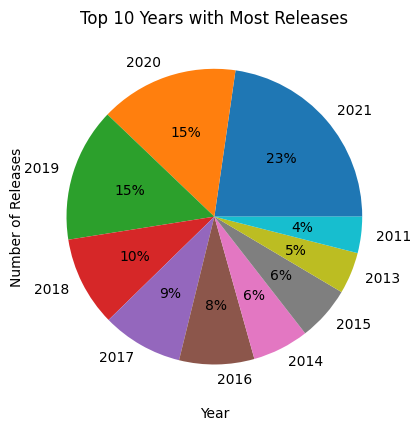

In [130]:
plt.pie(oyo[:10],labels=oko[:10],autopct="%1.0f%%")
plt.title("Top 10 Years with Most Releases")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()


                                                    #Conclusion:
                                   1.As you can see in the above Pie chart the most no. of release happens in the year 2021

                                             Q3. Are there any trends in the number of releases over the years?

In [131]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


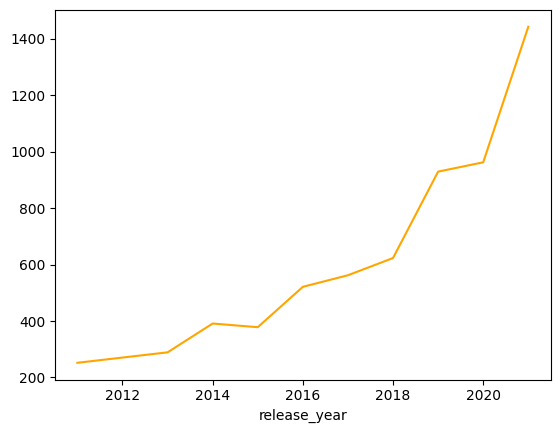

In [132]:
trend_axis=df["release_year"].value_counts().nlargest(10)
sns.lineplot(x=trend_axis.index,y=trend_axis.values,color="orange")
plt.show()

                                                       #Conclusion:
                                                       1.As you can see the trends that i saw here that they have release 
                                                       more movies and TV shows after 2019 means when COVID starts.

                                              Q4. Which are the top 3 countries producing the most content?

In [133]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [134]:
top_content_countries=df["country"].value_counts().nlargest(3)

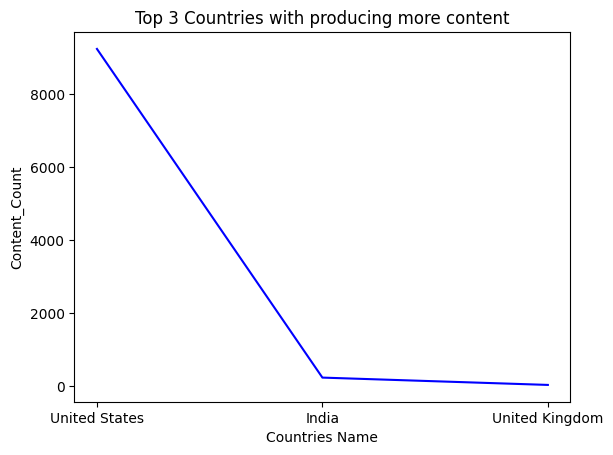

In [135]:
sns.lineplot(x=top_content_countries.index,y=top_content_countries.values,color="blue")
plt.xlabel("Countries Name")
plt.title("Top 3 Countries with producing more content")
plt.ylabel("Content_Count")
plt.show()

                                                       #CONCLUSION
                                                       1. The country that has the highest amount of content produced is USA.

                                                   Q5. How many unique countries are represented in the dataset?

In [136]:
print("The total_number of unique countries are",df["country"].nunique())

The total_number of unique countries are 86


                                                      Q6. What are the most common content ratings (like TV-MA, PG, etc.)?

In [137]:
common_rating=df["rating"].value_counts().nlargest(7) 

<Axes: xlabel='rating'>

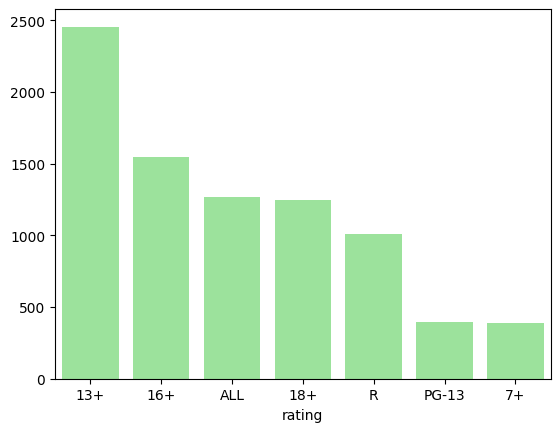

In [138]:
sns.barplot(x=common_rating.index,y=common_rating.values,color="lightgreen")

                                                      #Conclusion:->
                                                      1. The most common rating or we can say that the rating that was given most of the 
                                                          movies or TV shows is 13+.

                                                         Q7.Which are the top 5 most common genres/categories?

In [139]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


In [140]:
Genre=df["listed_in"].value_counts().nlargest(5)

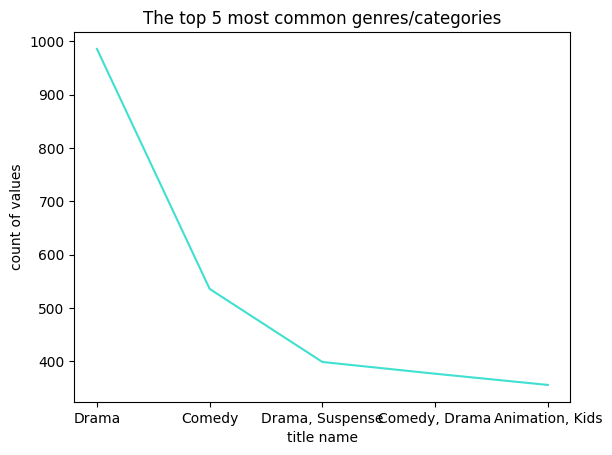

In [141]:
sns.lineplot(x=Genre.index,y=Genre.values,color="turquoise")
plt.title("The top 5 most common genres/categories")
plt.xlabel("title name")
plt.ylabel("count of values")
plt.show()           

                                                 #Conclusion
                                                 1. Drame has the highest count of genre or Categories.

                                                Q8.Which directors have the most titles?

In [142]:
director=df["director"].value_counts().nlargest(3)

<Axes: xlabel='director'>

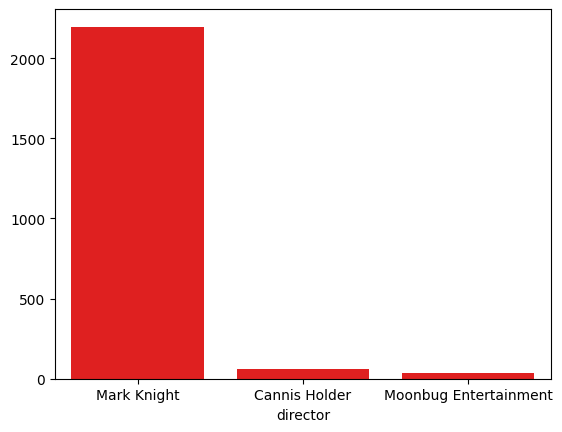

In [143]:
sns.barplot(x=director.index,y=director.values,color="red")

                                                #Conclusion:->
                                               1. Mark knight have the most titles


                                              Q9. Are there directors with only one title?

In [144]:
director=director.value_counts()

In [145]:
drr=director[director==1]

In [146]:
print("Number of directors with only one title:", len(drr))
print("\nSome of them are:\n", drr.head(10))

Number of directors with only one title: 3

Some of them are:
 count
2196    1
61      1
37      1
Name: count, dtype: int64


                                                    ###    BIVARIATE ANALYSIS

                                                   Q1. Do certain countries produce more TV Shows or Movies?

In [147]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


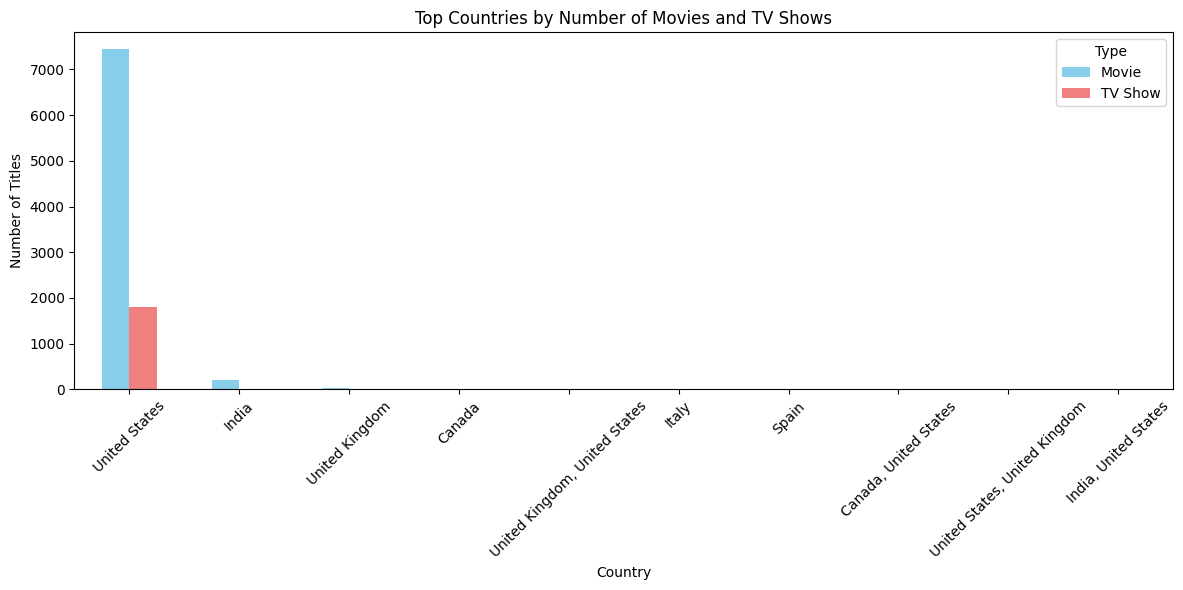

In [148]:
# Step 1: Group by country and type (TV Show / Movie)
type_by_country = df.groupby(['country', 'type']).size().unstack().fillna(0)

# Step 2: Sort by total content
type_by_country['Total'] = type_by_country.sum(axis=1)
top_countries = type_by_country.sort_values(by='Total', ascending=False).head(10)

# Step 3: Plot the top countries
top_countries[['Movie', 'TV Show']].plot(kind='bar', stacked=False, figsize=(12,6), color=['skyblue', 'lightcoral'])

plt.title('Top Countries by Number of Movies and TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


                                                  #Conclusion:
                                                  India may lean heavily toward Movies, US might balance both

In [149]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


                                                      Q2. Do certain countries dominate specific genres?/


In [150]:
data=df.head(5)

In [151]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


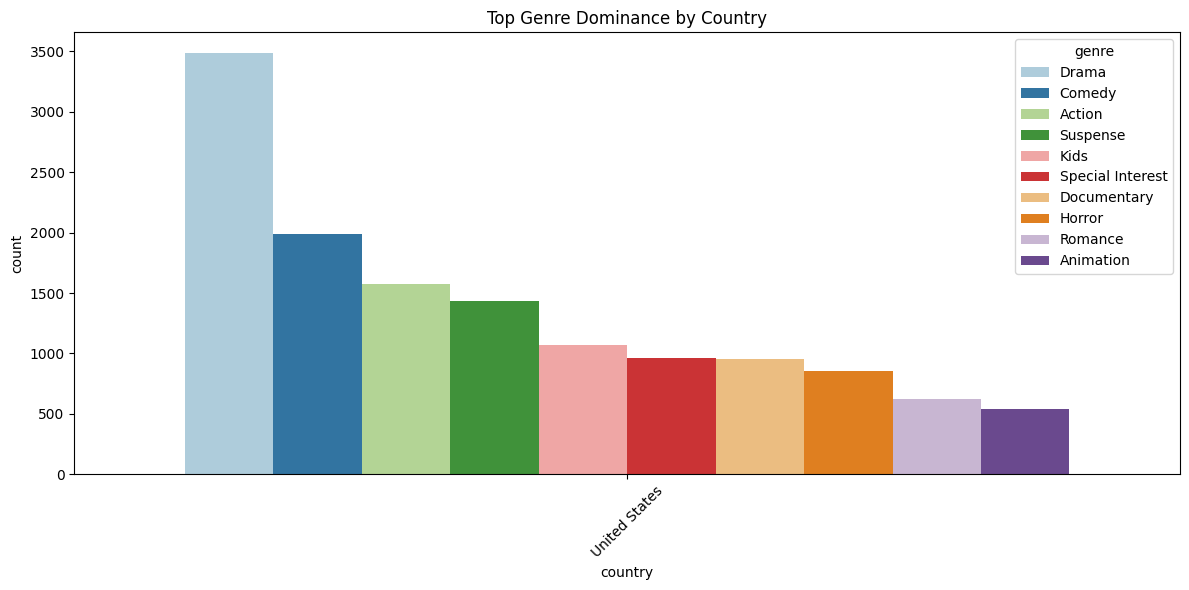

In [152]:
# Split multiple genres and explode the column
df_exploded = df.dropna(subset=['country', 'listed_in']).copy()
df_exploded['genre'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('genre')

# Group by country and genre
genre_by_country = df_exploded.groupby(['country', 'genre']).size().reset_index(name='count')

# Get top 10 combinations
top_genre_by_country = genre_by_country.sort_values(by='count', ascending=False).head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=top_genre_by_country, x='country', y='count', hue='genre', palette='Paired')
plt.title("Top Genre Dominance by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                                                #Conclusion:->
                                               1. United states has the highest dominance in the Drama genre.

                                               Q3. Release Year vs Rating

In [153]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


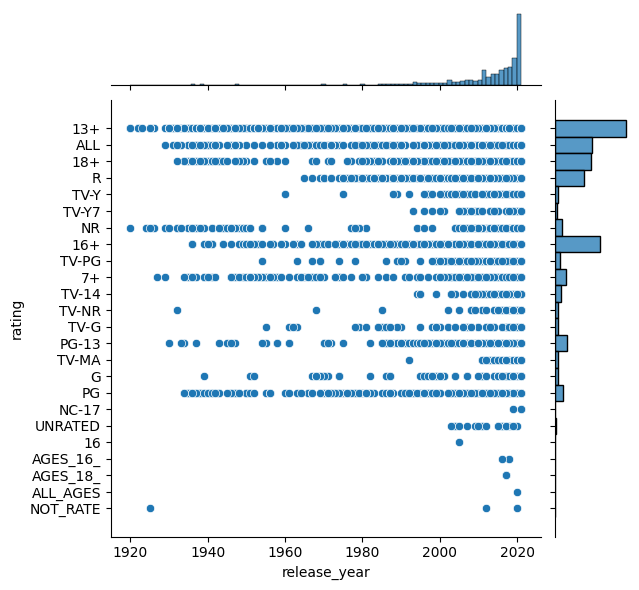

In [154]:
sns.jointplot(x="release_year", y="rating", data=df)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 831.0+ KB


In [156]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


In [157]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


#LABEL ENCODING 
NOW CONVERTING THE HUMAN DATA INTO THAT TYPE SO THAT IT CAN EASILY READ BY THE MACHINERY.

In [158]:
from sklearn.preprocessing import LabelEncoder

In [159]:
encoder=LabelEncoder()

In [173]:
df["show_id"]=encoder.fit_transform(df["show_id"])
df["type"]=encoder.fit_transform(df["type"])
df["country"]=encoder.fit_transform(df["country"])
df["rating"]=encoder.fit_transform(df["rating"])
df["listed_in"]=encoder.fit_transform(df["listed_in"])
df["duration"]=encoder.fit_transform(df["duration"])
df["title"]=encoder.fit_transform(df["title"])
df["director"]=encoder.fit_transform(df["director"])
df["cast"]=encoder.fit_transform(df["cast"])
df["date_added"]=encoder.fit_transform(df["date_added"])


In [174]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,0,0,8009,1464,984,8,47,2014,0,20,267
1,1111,0,7489,1898,4639,26,47,2018,0,17,387
2,2222,0,6796,2789,7384,60,47,2017,0,189,71
3,3333,0,6038,5017,2932,60,47,2014,0,182,321
4,4444,0,5225,1888,2760,51,47,1989,0,146,368


In [175]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [176]:
X=df.drop("duration",axis=1)
y=df["duration"]

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=102,test_size=0.2)

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rr=RandomForestClassifier()

In [181]:
rr.fit(X_train,y_train)

RandomForestClassifier()

In [182]:
prediction=rr.predict(X_test)

In [184]:
from sklearn.metrics import classification_report,confusion_matrix

In [185]:
print(confusion_matrix(y_test,prediction))

[[  2   0   0 ...   0   0   0]
 [  0 281   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   0   2   1]
 [  0   0   0 ...   0   1   1]
 [  0   0   0 ...   0   1   1]]


In [186]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.74      0.99      0.84       285
           2       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        29
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        17
           8       0.13      0.19      0.15        16
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         8
          14       0.07      0.06      0.06        17
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00        12
          19       0.12    

C:\Users\anshm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anshm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anshm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [187]:
from sklearn.metrics import accuracy_score

In [189]:
accuracy = accuracy_score(y_test, prediction)

In [194]:
print(accuracy**100)

7.684190473137357e-67


In [195]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,0,0,8009,1464,984,8,47,2014,0,20,267
1,1111,0,7489,1898,4639,26,47,2018,0,17,387
2,2222,0,6796,2789,7384,60,47,2017,0,189,71
3,3333,0,6038,5017,2932,60,47,2014,0,182,321
4,4444,0,5225,1888,2760,51,47,1989,0,146,368
